In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Wine_white.csv", sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# PROBLEM 1

## (A) Load the dataset *Wine_white.csv* into a Pandas dataframe. How many data records and how many features does the data set contain? Are all the features integers/floating point numbers?

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.shape

(4898, 12)

The data set contains 4898 data records. It also contains 12 features. Not all of the features are floating point numbers. One, quality, is an integer.

## (B) Use *pd.qcut()* to bin the wine quality scores into two ratings: B (bad) and G (good). Are the two rating categories balanced? Explain. What are the range of quality scores for each rating category?

In [6]:
(df['rating'],bins) = pd.qcut(df.quality,2,labels=['B','G'],retbins=True)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,B
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,B
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,B


In [7]:
df.rating.value_counts()

B    3838
G    1060
Name: rating, dtype: int64

These two ratings categories are not "balanced." There are way more bad wines than good wines. This could be that there are actually just a lot of bad wines, or that the bins created do not accurately represent the actual quality of the wine (the good/bad split is not even)

In [8]:
print(bins)

[3. 6. 9.]


In [9]:
df.quality.value_counts().sort_index(ascending=False)

9       5
8     175
7     880
6    2198
5    1457
4     163
3      20
Name: quality, dtype: int64

The good wine has a quality within 7-9. Bad wines are a quality of 6 or lower.

## (C) Split the data into 80% training and 20% testing data sets. Train a KNN classifier to predict the rating (bad/good) of a particular wine. Optimize the KNN number-of-neighbors hyper-parameter. Report your training and test error rate for the optimal value of the hyper-parameter. How good is your trained classifier? Explain.

In [10]:
(train,test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [11]:
features_train = train.iloc[:,0:-2]
features_test = test.iloc[:,0:-2]

In [12]:
targets_train = train.iloc[:,-1]
targets_test = test.iloc[:,-1]

In [13]:
features_train = scale(features_train)
features_test = scale(features_test)

In [14]:
targets_train = pd.get_dummies(targets_train)
targets_test = pd.get_dummies(targets_test)
targets_test.head(5)

,B,G
2762,1,0
42,1,0
1419,0,1
3664,0,1
2125,1,0


In [15]:
knn=KNeighborsClassifier()

In [16]:
knn.fit(features_train,targets_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
pred=knn.predict(features_test)

In [18]:
1-knn.score(features_test,targets_test)

0.18061224489795913

In [19]:
1-knn.score(features_train,targets_train)

0.10668708524757531

In [20]:
num_neighbors = []
err_train     = []
err_test      = []
for k in np.arange(0,50)+1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train,targets_train)
    num_neighbors.append(k)
    err_train.append(1 - knn.score(features_train,targets_train))
    err_test.append(1  - knn.score(features_test,targets_test))

errors = pd.DataFrame()
errors['n_neighbors'] = num_neighbors
errors['train']       = err_train
errors['test']        = err_test

Text(0, 0.5, 'error rate')

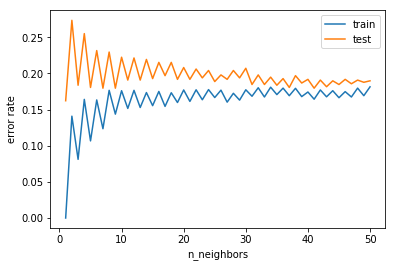

In [21]:
ax1 = errors.plot.line(x='n_neighbors',y='train')
errors.plot.line(x='n_neighbors',y='test',ax=ax1)
plt.ylabel('error rate')

In [22]:
print('min test error',errors.test.min().round(2))
ix = errors.test.idxmin()
print('optimal hyper-parameter value',errors.n_neighbors[ix])
print('training error',errors.train[ix])

min test error 0.16
optimal hyper-parameter value 1
training error 0.0


The KNN classifier is barely better than the baseline; KNN is 0.16, baseline is 0.22

## (D) Try and improve your KNN classifier by using distance weighting. Also try using different distance metrics. Report your best test error and how you achieved it.

min test error 0.13
optimal hyper-parameter value 8
training error 0.0


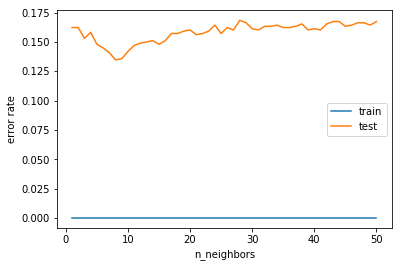

In [23]:
num_neighbors = []
err_train     = []
err_test      = []
for k in np.arange(0,50)+1:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(features_train,targets_train)
    num_neighbors.append(k)
    err_train.append(1 - knn.score(features_train,targets_train))
    err_test.append(1- knn.score(features_test,targets_test))
errors = pd.DataFrame()
errors['n_neighbors'] = num_neighbors
errors['train']       = err_train
errors['test']        = err_test
ax1 = errors.plot.line(x='n_neighbors',y='train')
errors.plot.line(x='n_neighbors',y='test',ax=ax1)
plt.ylabel('error rate')
print('min test error',errors.test.min().round(2))
ix = errors.test.idxmin()
print('optimal hyper-parameter value',errors.n_neighbors[ix])
print('training error',errors.train[ix])

The test error has been reduced to 0.13 (Used to be 0.16)

# PROBLEM 2

## (A) Load the dataset *Auto-cleaned.csv* into a Pandas dataframe. How many data records and how many features does the data set contain?

In [24]:
df = pd.read_csv("../Auto-cleaned.csv")

In [25]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [26]:
df = df.drop(df.columns[0],axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [27]:
df.shape

(392, 9)

The data set has 392 records and 9 features

## (B) Use *pd.qcut()* to bin the fuel economy (measured in mpg) of the vehicles in the dataset into four fuel economy ratings: P (poor), F (fair), G (good) and E (excellent). Are the four categories balanced? Explain. What are the range of mpg values for each rating?

In [28]:
(df['fuel economy'],bins) = pd.qcut(df.mpg,4,labels=['P','F','G','E'],retbins=True)
df.head(3)
print('rating bins',bins)

rating bins [ 9.   17.   22.75 29.   46.6 ]


In [29]:
df['fuel economy'].value_counts()

G    101
P     99
F     97
E     95
Name: fuel economy, dtype: int64

The four categories are balanced. There seems to be an almost even amount of vehicles in each category.

Poor = Between 9mpg and 17mpg

Fair = Between 17mpg and 22.75mpg

Good = Between 22.75mpg and 29mpg

Excellent = Between 29mpg and 46.6mpg

## (C) Split the data into 80% training and 20% testing data sets. Train a KNN classifier to predict a vehicle's fuel economy rating. Optimize the KNN number-of-neighbors hyper-parameter. Report your training and test error rate for the optimal value of the hyper-parameter. How good is your trained classifier? Explain.

In [30]:
(train,test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [31]:
features_train = train.iloc[:,1:-2]
features_test = test.iloc[:,1:-2]

In [32]:
targets_train = train.iloc[:,-1]
targets_test = test.iloc[:,-1]

In [33]:
features_train = scale(features_train)
features_test = scale(features_test)

C:\Users\rileyma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\rileyma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [34]:
targets_train = pd.get_dummies(targets_train)
targets_test = pd.get_dummies(targets_test)
targets_test.head(5)

,P,F,G,E
144,0,0,1,0
280,0,1,0,0
68,1,0,0,0
372,0,0,0,1
328,0,0,0,1


In [35]:
knn=KNeighborsClassifier()

In [36]:
knn.fit(features_train,targets_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
pred=knn.predict(features_test)

In [38]:
knn.score(features_train,targets_train)

0.8242811501597445

In [39]:
knn.score(features_test,targets_test)

0.7848101265822784

In [40]:
num_neighbors = []
err_train     = []
err_test      = []
for k in np.arange(0,50)+1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train,targets_train)
    num_neighbors.append(k)
    err_train.append(1 - knn.score(features_train,targets_train))
    err_test.append(1  - knn.score(features_test,targets_test))

errors = pd.DataFrame()
errors['n_neighbors'] = num_neighbors
errors['train']       = err_train
errors['test']        = err_test

In [41]:
print('min test error',errors.test.min().round(2))
ix = errors.test.idxmin()
print('optimal hyper-parameter value',errors.n_neighbors[ix])
print('training error',errors.train[ix])

min test error 0.16
optimal hyper-parameter value 7
training error 0.19808306709265178


The KNN is much better than the baseline. The baseline is 0.75 error rate, while KNN is 0.16

## (D) Repeat parts (B) and (C) except use just two ratings: B (bad) and G (good). Which rating categories, two categories or four, would you recommend be used? Justify your answer.

In [42]:
(df['fuel economy'],bins) = pd.qcut(df.mpg,2,labels=['B','G'],retbins=True)
df.head(3)
print('rating bins',bins)

rating bins [ 9.   22.75 46.6 ]


In [43]:
df['fuel economy'].value_counts().sort_index()

B    196
G    196
Name: fuel economy, dtype: int64

In [44]:
(train,test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)
features_train = train.iloc[:,1:-2]
features_test  = test.iloc[:,1:-2]
features_train = scale(features_train)
features_test  = scale(features_test)
targets_train = train.iloc[:,-1]
targets_test  = test.iloc[:,-1]
targets_train = pd.get_dummies(targets_train)
targets_test  = pd.get_dummies(targets_test)


C:\Users\rileyma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\rileyma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


min test error 0.06
optimal hyper-parameter value 1
training error 0.0


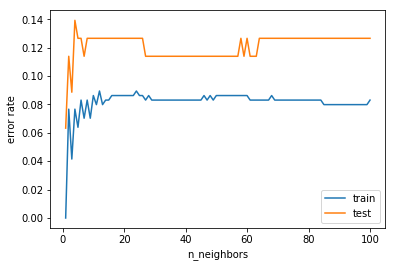

In [45]:
num_neighbors = []
err_train     = []
err_test      = []
for k in np.arange(100)+1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train,targets_train)
    num_neighbors.append(k)
    err_train.append(1 - knn.score(features_train,targets_train))
    err_test.append(1- knn.score(features_test,targets_test))
errors = pd.DataFrame()
errors['n_neighbors'] = num_neighbors
errors['train']       = err_train
errors['test']        = err_test
ax1 = errors.plot.line(x='n_neighbors',y='train')
errors.plot.line(x='n_neighbors',y='test',ax=ax1)
plt.ylabel('error rate')
print('min test error',errors.test.min().round(2))
ix = errors.test.idxmin()
print('optimal hyper-parameter value',errors.n_neighbors[ix])
print('training error',errors.train[ix])

I would switch to the two rating categories, rather than the 4. This new error rate of 0.06 is much better than 0.16, the error rate of the old KNN classifier. This is a much more accurate classifier.

# PROBLEM 3

## Code the KNN classifier and compare the test error rate to Sklearn's KNN classifier's test error rate on the iris classification problem. Use city-block distance (p=1 in Sklearn's KNN classifier). Your code should allow the neighborhood size to be varied. Skeleton code is provided below.

In [46]:
df = pd.read_csv("../Iris-cleaned.csv")

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
df_train = df.sample(frac=0.8,random_state=0)
df_test  = df.drop(df_train.index)
features_train = df_train.iloc[:,0:4]
features_test  = df_test.iloc[:,0:4]
targets_train = df_train.iloc[:,-1]
targets_test  = df_test.iloc[:,-1]

In [49]:
features_train = (features_train - features_train.mean())/features_train.std()
features_test  = (features_test  - features_test.mean())/features_test.std()

In [50]:
def KNN(features_train,targets_train,features_test,n_neighbors=5):
    num_records = features_test.shape[0]
    targets_predicted = pd.Series(range(num_records))
    for k in range(num_records):
        distance = (features_train - features_test.iloc[k,:]).abs().sum(axis=1)
        distance_to_target = pd.DataFrame()
        distance_to_target['training_targets'] = targets_train
        distance_to_target['distance'] = distance
        prediction = distance_to_target.sort_values('distance').head(n_neighbors)['training_targets'].mode()[0]
        targets_predicted[k] = prediction
    return targets_predicted

In [51]:
K = 5

targets_predicted = KNN(features_train,targets_train,features_test,n_neighbors=K)
error_rate = 1 - accuracy_score(targets_test,targets_predicted)
print('neighborhood size =',K,'  test error rate =',round(error_rate,3))
print()

# sklearn knn routine
knn = KNeighborsClassifier(n_neighbors=K,p=1)
knn.fit(features_train,targets_train)
targets_predicted = knn.predict(features_test)
error_rate = 1 - accuracy_score(targets_test,targets_predicted)
print('Sklearn KNN')
print('neighborhood size =',K,'  test error rate =',round(error_rate,3))

neighborhood size = 5   test error rate = 0.1

Sklearn KNN
neighborhood size = 5   test error rate = 0.1
